## 1.0  Basic Statistics

Let's say we want to work data on the price of certificate of entitlement (COE) from January 2010 to March 2018.  There are a few categories of COE but we focus only Category A to simplify the following discussion.

The file containing the data has been downloaded from data.gov.sg

The filename is COE_Results_CatA.csv

We first read the file into our program. 

Since there are a few columns of data and we wish to view some basic statistics for those columns, it is easier to read in the data as a panda dataframe.  A panda dataframe has a structure just like that of a spreadsheet that we are all very familiar with.

Import pandas before using it.

Note where your data file is located so that you can use the correct path.

In [1]:
import pandas as pd
#COE = pd.read_csv('Data/COE_Results_CatA.csv', engine='python')
COE = pd.read_csv('Data/COE_Results_CatA.csv')

Check the data read in:  examine the first few rows(use the .head() method) and the last few rows (use the .tail() method).

In [2]:
COE.head(5)

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
0,2010-01,1,Category A,1152,1145,1342,18502
1,2010-01,2,Category A,1151,1149,1673,20501
2,2010-02,1,Category A,1154,1153,1326,19989
3,2010-02,2,Category A,1148,1148,1493,20340
4,2010-03,1,Category A,1148,1141,1758,20802


In [3]:
COE.tail(5)

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
192,2018-01,1,Category A,1693,1693,2264,41400
193,2018-01,2,Category A,1713,1708,1938,36890
194,2018-02,1,Category A,1557,1534,2389,40000
195,2018-02,2,Category A,1562,1561,2073,36810
196,2018-03,1,Category A,1580,1572,2405,38830


We next check the type of data to see if we need to change any of them.  
Note that datatype object in a panda dataframe refers to a string.

In [4]:
COE.dtypes

month            object
bidding_no        int64
vehicle_class    object
quota             int64
bids_success      int64
bids_received     int64
premium           int64
dtype: object

We noted that month is read in as an object (a string).  However, it is actually a date-type of data.

We can convert it to a date-type of obect. First, we must make some assumptions about the data to modify it for our purposes. You will note that our original month data is in the YYYY-MM format.  However, in panda dataframe, the date datatype is in YYYY-MM-DD type.  The day is missing from our data.

Python will insert a default day (1) in place of the missing day data.  However, there are two bidding days each month and when we convert the month data to a date type data, the two days within the same month cannot be distinguished from each other if we allow the python default value to be inserted for both of them.

For example, row 1 (index 0) and row 2 (index 1)  have the same YYYY-MM data:  2010-01.  We distinguish between the two bids by the second column (bidding_no)

When converted to the date type of data, both will show the same date  2010-01-01

Hence, we assume that the first bid of the month takes place on 1st and the second bid on 15th.

We create a new column called month modified to show the days of the first and second bid for the month.

The first row of code below  adds the day 01 to all the dates shown in the month column.

The second row of code makes a conditional assignment:  if the bidding_no is 2, the second bid of the month, then we insert the day as 15.

The code 

COE.loc[COE['bidding_no'] == 2, 'month_modified'] = COE['month']+'-15'

looks at the column with the name 'bidding_no' and is if it is 2, the value in column 'month_modified' is YYYY-MM-15.  COE['month'] contains the YYYY-MM value and the + is a concatenation operator.

Note that all these operations are done with the datatype in 'month' and 'month_modified' as strings.

In [3]:
COE['month_modified'] = COE['month']+'-01'
COE.loc[COE['bidding_no'] == 2, 'month_modified'] = COE['month']+'-15'
COE['month_modified'].head(5)

0    2010-01-01
1    2010-01-15
2    2010-02-01
3    2010-02-15
4    2010-03-01
Name: month_modified, dtype: object

We convert the datatype for 'month_modified' from string to datetime.

In [4]:
pd.to_datetime(COE['month_modified'])

0     2010-01-01
1     2010-01-15
2     2010-02-01
3     2010-02-15
4     2010-03-01
5     2010-03-15
6     2010-04-01
7     2010-04-15
8     2010-05-01
9     2010-05-15
10    2010-06-01
11    2010-06-15
12    2010-07-01
13    2010-07-15
14    2010-08-01
15    2010-08-15
16    2010-09-01
17    2010-09-15
18    2010-10-01
19    2010-10-15
20    2010-11-01
21    2010-11-15
22    2010-12-01
23    2010-12-15
24    2011-01-01
25    2011-01-15
26    2011-02-01
27    2011-02-15
28    2011-03-01
29    2011-03-15
         ...    
167   2016-12-15
168   2017-01-01
169   2017-01-15
170   2017-02-01
171   2017-02-15
172   2017-03-01
173   2017-03-15
174   2017-04-01
175   2017-04-15
176   2017-05-01
177   2017-05-15
178   2017-06-01
179   2017-06-15
180   2017-07-01
181   2017-07-15
182   2017-08-01
183   2017-08-15
184   2017-09-01
185   2017-09-15
186   2017-10-01
187   2017-10-15
188   2017-11-01
189   2017-11-15
190   2017-12-01
191   2017-12-15
192   2018-01-01
193   2018-01-15
194   2018-02-

##  2.0 Basic Plots

We first plot some graphs to see how what the data looks like.

matplotlib is the most common library used for plotting the data

The first plot we want to look at a basic line plot  It shows the trend of the COE price from 2010 to 2018.

Pandas has a built-in plot function.  The syntax is DataFrame.plot.  Documentation is given in the website:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

Here, you have to set the x-axis labels if it does not show up in the plot by the command:

ax.set_xticklabels

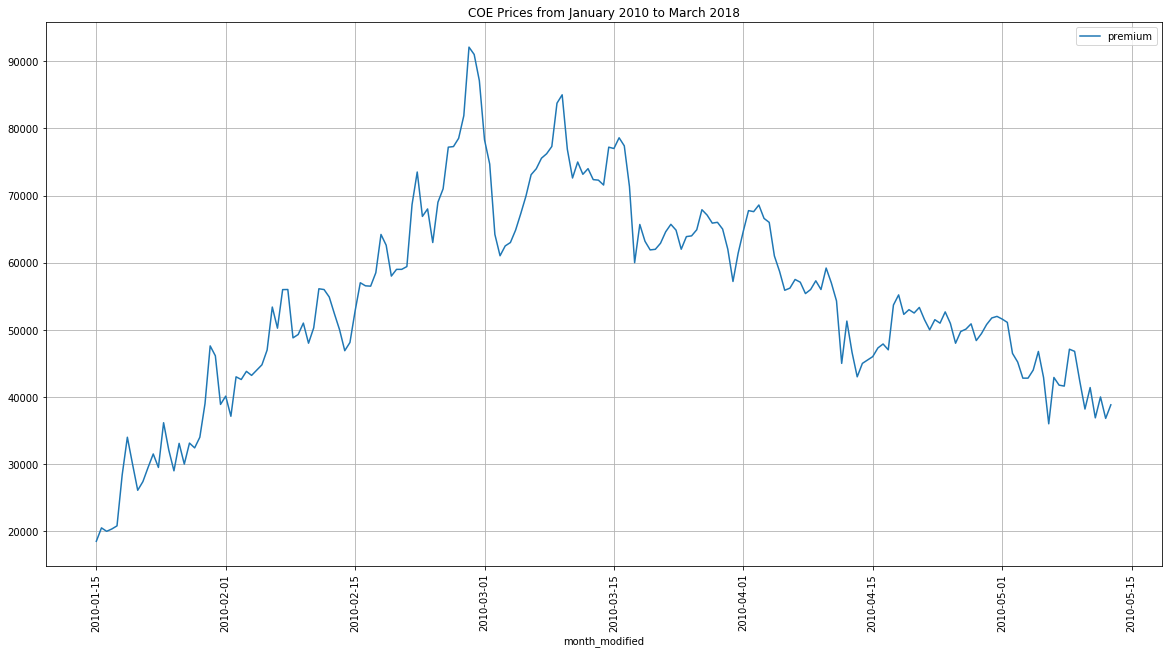

In [44]:
title_text = 'COE Prices from January 2010 to March 2018'
ax = COE.plot(x='month_modified', y='premium',figsize = (20,10), title=title_text,grid = True, legend =True, rot=90)
ax.set_xticklabels(COE["month_modified"]);


Another useful plot is the histogram.  
It shows the frequency of each category of COE prices.  
This provides us with a good idea of the distribution of the data.

Here, we divide the prices into 10 bins or categories.  
It is noted that the most frequent prices range from $45,000 to $70,000.

Since the hist plot is a function within matplotlib, we must import the library before using the plt.hist command

The documentation is given in:
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

The plt.figure(figsize=(20,10)) command sets the size of the figure.

The "ec" parameter belw refers to the edgecolor - the color of lines between the bins.  The default is none.


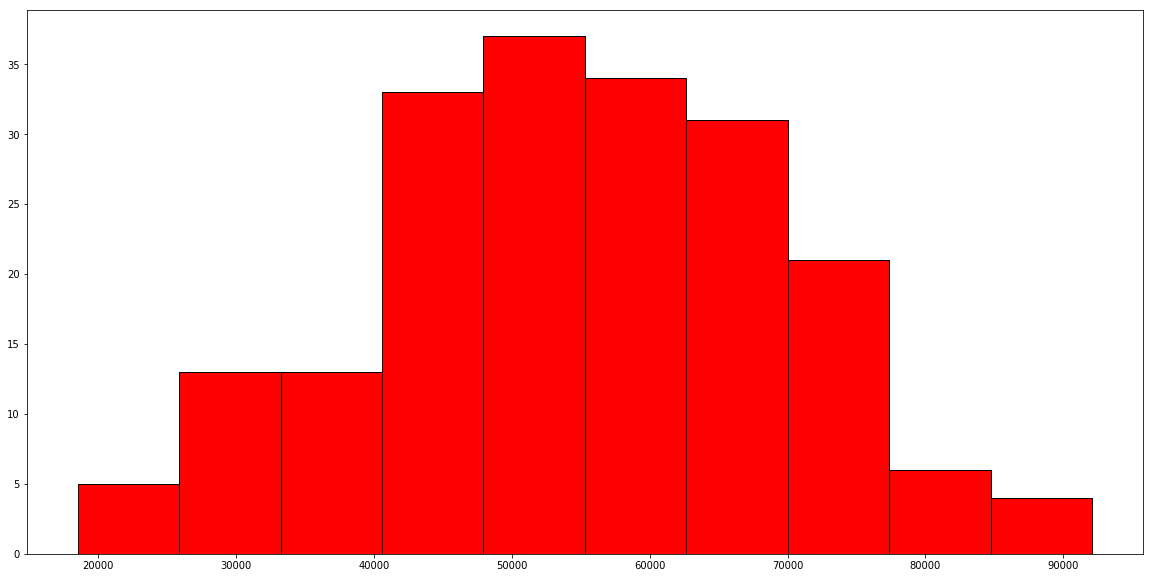

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.hist(COE['premium'], bins=10, color = 'red', ec ='black');


## 3.0  Basic Descriptive Statistics

Next we look at the descriptive statistics of the COE premium.  This would be the minimum, maximum, mean, median, and standard deviation.  We can do this easily by using the functions from the numpy library.

We import the numpy library first. 

In [32]:
import numpy as np
Minimum = round(np.min(COE['premium']),0)
Maximum = round(np.max(COE['premium']),0)
Mean = round(np.mean(COE['premium']),0)
Median = round(np.median(COE['premium']),0)
Sd = round(np.std(COE['premium']),0)

#print the values
print('Minimum: ', Minimum)
print('Maximum: ', Maximum)
print('Mean: ', Mean)
print('Median: ', Median)
print('Standard Deviation: ', Sd)

Minimum:  18502
Maximum:  92100
Mean:  54714.0
Median:  54301.0
Standard Deviation:  14809.0


The basic statistics whow that you life is unfair - you could drive exactly the same car but pay very different price for it because of the COE.  THe maximum COE of $92,100 is almost five times the minimum of $18,502; and almost twice the median.

The standard deviation, $14,809, indicates the degree of variation in the COE price.  Its value is about a quarter of the mean - which we take as not being too severe.  However, the high level of the mean ($54,714) seen in the context of a typical non-luxury car (less $40,000) gives the perception that the COE is expensive.

Let's say we want to compare the COE prices across the different years.

To do so, we must first identify and group all the observations belonging to the same year.  Note that that our date data are in two columns:

month :  YYYY-MM (datatype:  string)
month_modified:  YYYY-MM-DD (datatype:  datetime64[ns])

We only wish to group according to years.  The presence of the month and day information in the above two columns complicate the grouping task.

So apply the pd.DatetimeIndex method to the data in the "month_modified" column.  This method saves the datetime data in a format that allows us to separate the date components into day, month and year  We can then extract the year as a new variable. 

In [5]:
dates = pd.DatetimeIndex(COE['month_modified'])
COE['year'] = dates.year
COE.head(10)

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium,month_modified,year
0,2010-01,1,Category A,1152,1145,1342,18502,2010-01-01,2010
1,2010-01,2,Category A,1151,1149,1673,20501,2010-01-15,2010
2,2010-02,1,Category A,1154,1153,1326,19989,2010-02-01,2010
3,2010-02,2,Category A,1148,1148,1493,20340,2010-02-15,2010
4,2010-03,1,Category A,1148,1141,1758,20802,2010-03-01,2010
5,2010-03,2,Category A,1146,1137,2183,28389,2010-03-15,2010
6,2010-04,1,Category A,705,597,1379,34001,2010-04-01,2010
7,2010-04,2,Category A,706,704,1242,30000,2010-04-15,2010
8,2010-05,1,Category A,806,798,1294,26102,2010-05-01,2010
9,2010-05,2,Category A,699,697,1036,27389,2010-05-15,2010


In [56]:
COE.tail(10)

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium,month_modified,year
187,2017-10,2,Category A,1815,1809,2391,41617,2017-10-15,2017
188,2017-11,1,Category A,1683,1683,3430,47112,2017-11-01,2017
189,2017-11,2,Category A,1686,1679,2721,46791,2017-11-15,2017
190,2017-12,1,Category A,1680,1667,2158,42339,2017-12-01,2017
191,2017-12,2,Category A,1687,1654,1970,38200,2017-12-15,2017
192,2018-01,1,Category A,1693,1693,2264,41400,2018-01-01,2018
193,2018-01,2,Category A,1713,1708,1938,36890,2018-01-15,2018
194,2018-02,1,Category A,1557,1534,2389,40000,2018-02-01,2018
195,2018-02,2,Category A,1562,1561,2073,36810,2018-02-15,2018
196,2018-03,1,Category A,1580,1572,2405,38830,2018-03-01,2018


We use the .groupby method to group the data by year.

The grouped variable, groupByYear is now a GroupBy object.  This does not do anything to the data yet.  It just holds information in a manner that allows us to apply operations the groups defined.  

In [58]:
groupByYear = COE.groupby(COE['year'])
groupByYear

We can then easily find out the mean value of the COE premium for each year.

In [59]:
round(groupByYear['premium'].mean(),0)

year
2010    30382.0
2011    48206.0
2012    63898.0
2013    74690.0
2014    67675.0
2015    60601.0
2016    49587.0
2017    45991.0
2018    38786.0
Name: premium, dtype: float64

Alternatively, we can plot the average COE prices for each year as illustrated below.

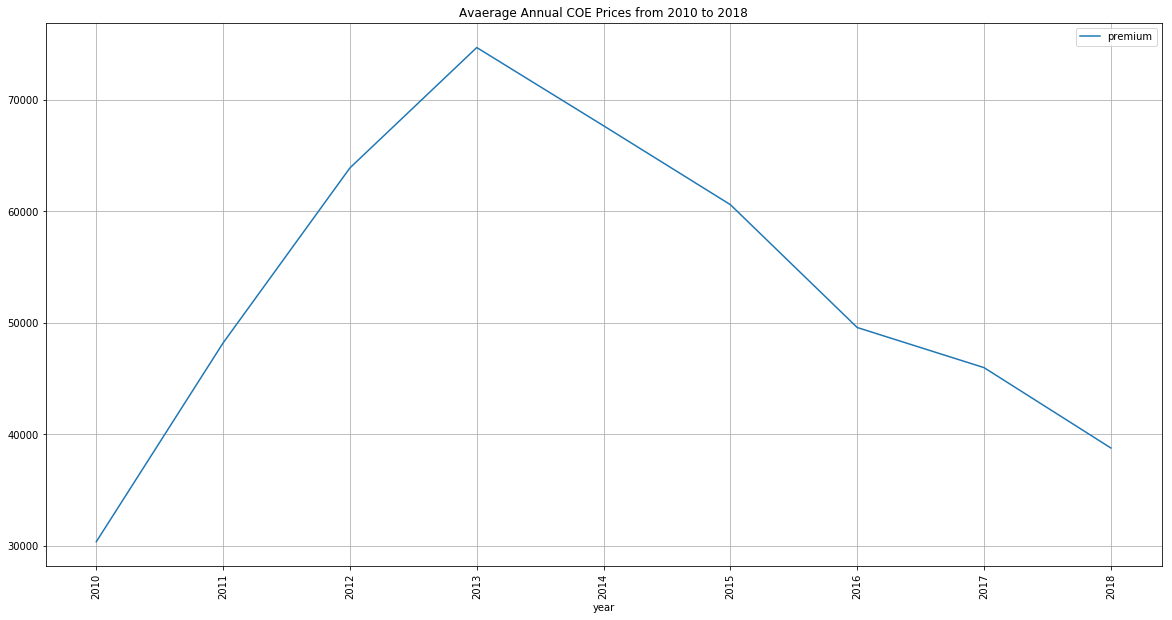

In [70]:
title_text = 'Avaerage Annual COE Prices from 2010 to 2018'

COE.groupby('year').mean().plot(y='premium',figsize = (20,10), title=title_text,grid = True, legend =True, rot=90);


The analysis by year shows that you are out of luck if you had to buy a car in 2013.  The average COE prices were the highest.  It started going down after that.  

It would be interesting to find out whether there was significantly more than the usual number of cars less than 3 yeear old scrapped in 2016.  Those who bought cars with the expensive COE in 2013 may scarp their cars in 2016 to recover the unused value of the COE.  

The value of the COE is decreases linearly to $0 at the end of 10 years.  So if you had bought the COE for $90,000, you can receive $63,000 of the COE value back if you scarp the car after three years ($100,000 x 7/10).

Note that if you do not define the column (in our case above, it is 'premium') to take the mean for, the mean of all the columns containing numeric values will be computed.

In [53]:
round(groupByYear.mean(),1)

,bidding_no,quota,bids_success,bids_received,premium
year,,,,,
2010,1.5,780.3,766.3,1120.8,30381.8
2011,1.5,542.8,529.5,886.0,48206.2
2012,1.5,537.9,522.4,779.9,63898.0
2013,1.5,355.6,352.3,706.7,74690.0
2014,1.5,509.6,505.3,879.3,67675.3
2015,1.5,1369.5,1359.5,2030.9,60601.2
2016,1.5,2030.6,2007.5,3081.8,49586.8
2017,1.5,1886.8,1874.7,2548.3,45990.7
2018,1.4,1621.0,1613.6,2213.8,38786.0


We can try to visualize the data for the different years to see how different they are.  Below we use the scatterplot.

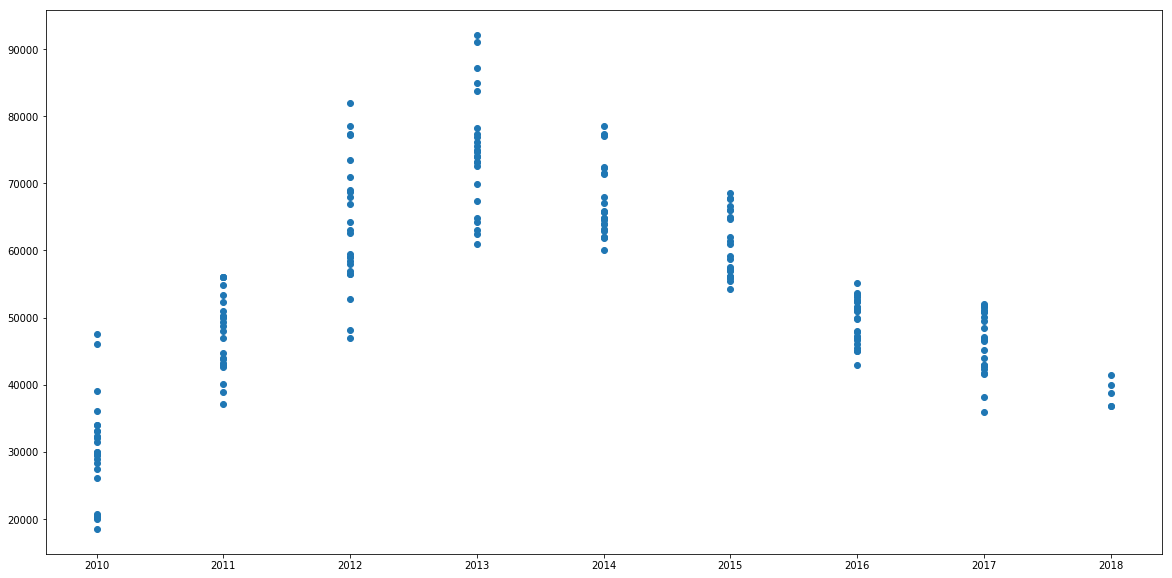

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(COE['year'],COE['premium']);
#plt.show()

The scatterplot provides visual overview of the price movement over the years as well as the spread of the price during the each year.  We note that there are overlaps in prices from each year to the next - you could have paid more for a COE in a low average price year compared a higher average priced year. 

A more instructive chart would be a boxplot that is grouped byyear.  The boxplot shows the median of the premium.  The first quartile is the bottom of the box whilst the third quartile is the top of the box.  The first line beyond the upper and the lower boundry of the boxes are the whiskers.  The whiskers are the maximum (if whisker above top boundary of box) or minimum (if whisker below bottom boundary of box values) if there are no other values beyond the whisker.

If there are values beyond the whiskers, the top whisker is actually 1.5*IQR above the top boundary of box.  The bottom whisker is 1.5*IQR below the bottom boundary of the box.  IQR is the interquartile range, defined as the (third quartile - first quartile).

Any values beyond the whiskers are outliers.

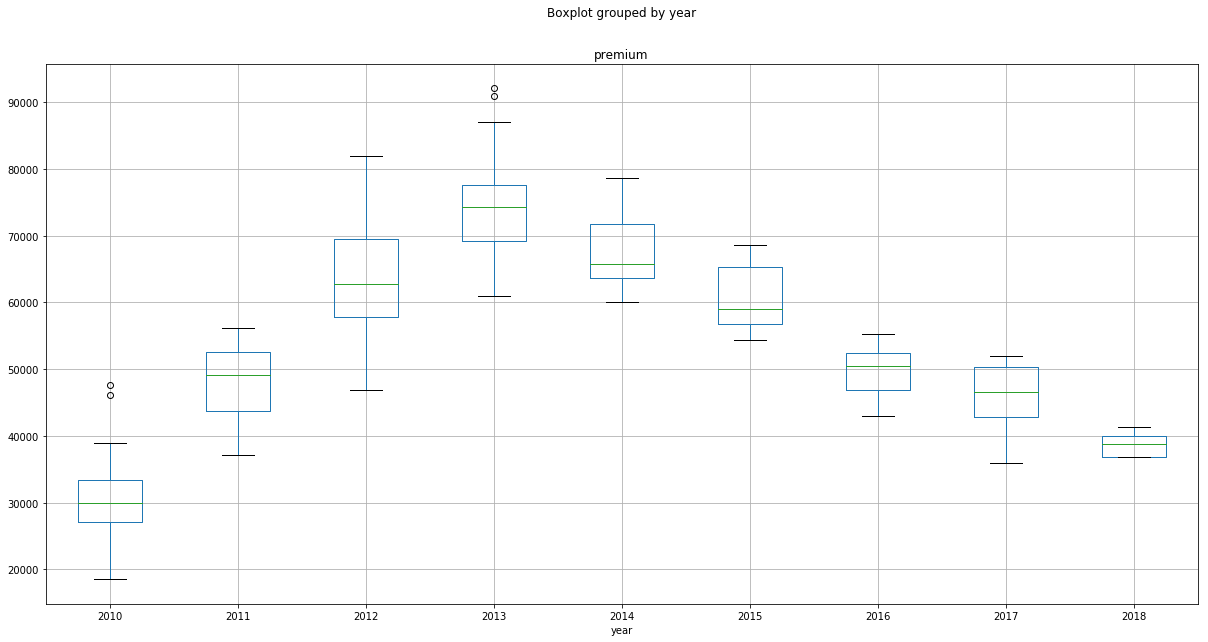

In [8]:
COE.boxplot(column =['premium'], by = 'year', figsize = (20,10));

The boxplot shows outliers in the bid for two years - 2010 and 2013.  2013's outliers were the highest bid within the nine years (eight complete years) studied.  It would be interesting to match it with other data to see what could have accounted for these extremely high bids.

The boxplot also shows the interquartile range (where 50% of the prices reside) appear to be smaller when the general level of prices are lower.  Uncertaintly in price (indicated by the higher interquartile range) may lead to higher general level of prices that is evidenced by the patterns of teh boxplots above.   

Visually, the boxplot shows that the means of the premiums may be  very different for the years.  We can run a formal statistical test to see if the groups (that is the premiums from different years) ALL come from the same distribution.  Note that there are nine groups there.  As long as there is one group different from the rest, the test will flag that the groups do not come from the same distribution.  This is called the ANOVA (Analysis of Variance) test.

The null hypothesis is that all the data come from the same distribution.  The very small p-value in the results (PR>F) indicates that there is negligible probability that the null hypothesis can be true and yet produce the data that we have on hand.  

Hence, we have to reject the null hypothesis that the premium for each year come from the same distribution. 

In [67]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('premium~C(year)',COE).fit()
anovaResults = anova_lm(model)
print(anovaResults)

             df        sum_sq       mean_sq           F        PR(>F)
C(year)     8.0  3.541649e+10  4.427061e+09  106.920903  8.923209e-66
Residual  188.0  7.784141e+09  4.140501e+07         NaN           NaN


The above statistical test show that at least one of the nine groups are different from the rest.  Which specific groups are different, and which are the same?

We can use the t-test to conduct pairwise comparisons of each group of data to find out which is the same and which are different.

Below are two examples:  one comparing the year 2010 with the year 2013.  They are very different and the t-test show it.  The p-value is close to zero, which means that the null hypothesis (that the two groups are the same) can be rejected.

The other example compare year 2011 to year 2017.  The p-value is 0.14 or 14%.  We do not reject the null hypothesis that the two groups are the same.

Note:  we usually reject the null hypothesis when p value is less than 10%.  If you want to be strciter, we reject only when the p value is less than 5%.

There are more complicated tests that can carry out the pairwise comparisons for all the pari at once.  However, this is to illustrate the general steps in a statiscal analysis and we shall not discuss the more complex techniques in this class. 

In [91]:
stats.ttest_ind(groupByYear.get_group(2010)['premium'],groupByYear.get_group(2013)['premium'])

Ttest_indResult(statistic=-19.061372121506277, pvalue=1.8136026981843356e-23)

In [92]:
stats.ttest_ind(groupByYear.get_group(2011)['premium'],groupByYear.get_group(2017)['premium'])

Ttest_indResult(statistic=1.4845219114403607, pvalue=0.14449130526750015)

In [94]:
t, p = stats.ttest_ind(groupByYear.get_group(2010)['premium'],groupByYear.get_group(2013)['premium'])
print(t, p)

-19.0613721215 1.81360269818e-23


In [100]:
for i in range(2010,2017,1):
    for j in range(i+1,2018,1):
        t, p = stats.ttest_ind(groupByYear.get_group(i)['premium'],groupByYear.get_group(j)['premium'])
        if p < 0.05: 
            sig = 'significant'
        else:
            sig =' '
        print('Comparion Years: ', i, ' ',j, ' ', 't = ', t, ' p = ', p, sig  )



Comparion Years:  2010   2011   t =  -9.27333931452  p =  4.23786767436e-12 significant
Comparion Years:  2010   2012   t =  -13.6271213968  p =  9.20964346363e-18 significant
Comparion Years:  2010   2013   t =  -19.0613721215  p =  1.81360269818e-23 significant
Comparion Years:  2010   2014   t =  -19.5731452036  p =  6.11141130445e-24 significant
Comparion Years:  2010   2015   t =  -16.796268668  p =  2.98111405847e-21 significant
Comparion Years:  2010   2016   t =  -11.5331315357  p =  3.60327442693e-15 significant
Comparion Years:  2010   2017   t =  -8.785577647  p =  2.11329240162e-11 significant
Comparion Years:  2011   2012   t =  -6.93471251745  p =  1.14175521346e-08 significant
Comparion Years:  2011   2013   t =  -12.520409936  p =  2.01493860847e-16 significant
Comparion Years:  2011   2014   t =  -11.845686445  p =  1.42658740112e-15 significant
Comparion Years:  2011   2015   t =  -8.15883274996  p =  1.7267980161e-10 significant
Comparion Years:  2011   2016   t =  -